In [ ]:
# ============================================================================
# FACEBOOK EGO NETWORK ANALYSIS
# ============================================================================
# This notebook analyzes the Facebook ego network dataset to uncover:
# - Network topology and structural properties
# - Key influential nodes using centrality metrics
# - Community structure and social clustering patterns
# ============================================================================


# ## 1. Environment Setup
# Import necessary libraries for network analysis and visualization

In [1]:


# %%
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from networkx.algorithms import community
from matplotlib import cm
from matplotlib.colors import Normalize
import math


# Configure visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100



# ## 2. Data Loading
# Load the Facebook combined ego network dataset

In [2]:
# Load graph from edge list file
# Expected format: space-separated pairs of node IDs per line
file_path = 'facebook_combined.txt'
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

print(f"✓ Graph loaded successfully with {G.number_of_nodes():,} nodes and {G.number_of_edges():,} edges")



✓ Graph loaded successfully with 4,039 nodes and 88,234 edges


# ## 3. Network Topology Analysis
# Compute fundamental graph properties to understand network structure

In [3]:

# Calculate basic network metrics
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
degrees = dict(G.degree())
avg_degree = sum(degrees.values()) / n_nodes
density = nx.density(G)
is_connected = nx.is_connected(G)

# Display basic statistics
print("=" * 60)
print("NETWORK TOPOLOGY SUMMARY")
print("=" * 60)
print(f"Nodes:                    {n_nodes:>12,}")
print(f"Edges:                    {n_edges:>12,}")
print(f"Average Degree:           {avg_degree:>12.2f}")
print(f"Density:                  {density:>12.6f}")
print(f"Connected:                {is_connected:>12}")

# Compute path metrics only if graph is connected
if is_connected:
    diameter = nx.diameter(G)
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Diameter:                 {diameter:>12}")
    print(f"Avg Shortest Path Length: {avg_path_length:>12.2f}")
else:
    print("Graph is disconnected - path metrics not computed")

print("=" * 60)



NETWORK TOPOLOGY SUMMARY
Nodes:                           4,039
Edges:                          88,234
Average Degree:                  43.69
Density:                      0.010820
Connected:                           1
Diameter:                            8
Avg Shortest Path Length:         3.69


# ## 4. Degree Distribution Analysis
# Visualize the distribution of node degrees to identify network characteristics

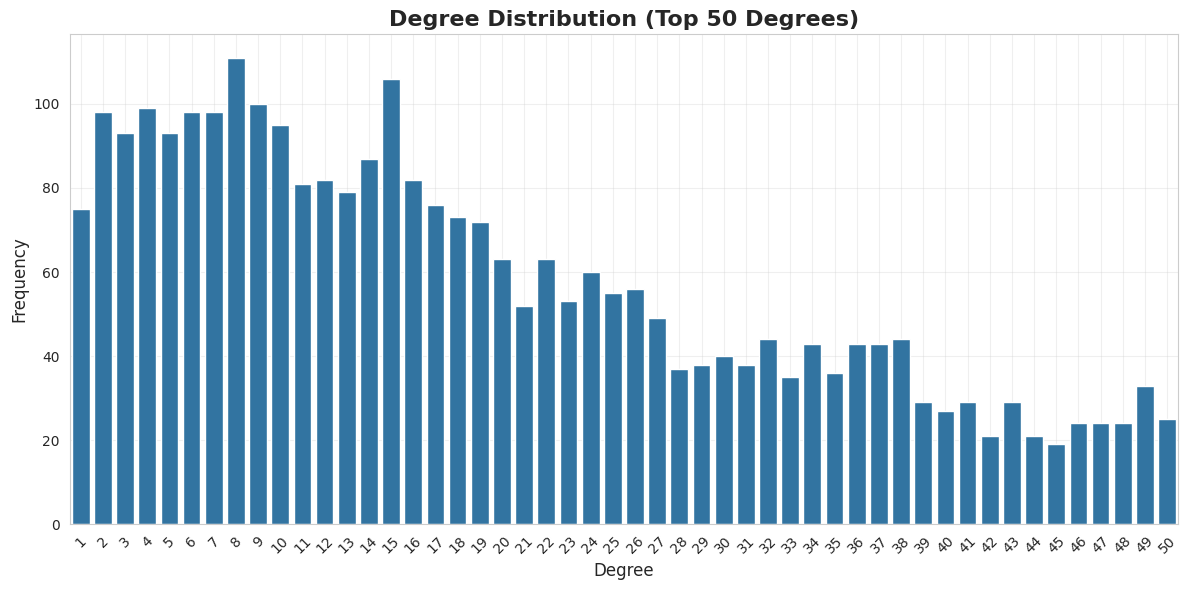

Most connected node has degree: 1045
Least connected node has degree: 1


In [4]:

# Extract and sort degree sequence
degree_sequence = sorted(degrees.values(), reverse=True)
degree_count = Counter(degree_sequence)

# Prepare data for visualization (limit to top 50 degrees for clarity)
deg_vals, cnt_vals = zip(*sorted(degree_count.items())[:50])

# Create degree distribution plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=list(deg_vals), y=list(cnt_vals), ax=ax)
ax.set_title("Degree Distribution (Top 50 Degrees)", fontsize=16, fontweight='bold')
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Most connected node has degree: {max(degree_sequence)}")
print(f"Least connected node has degree: {min(degree_sequence)}")



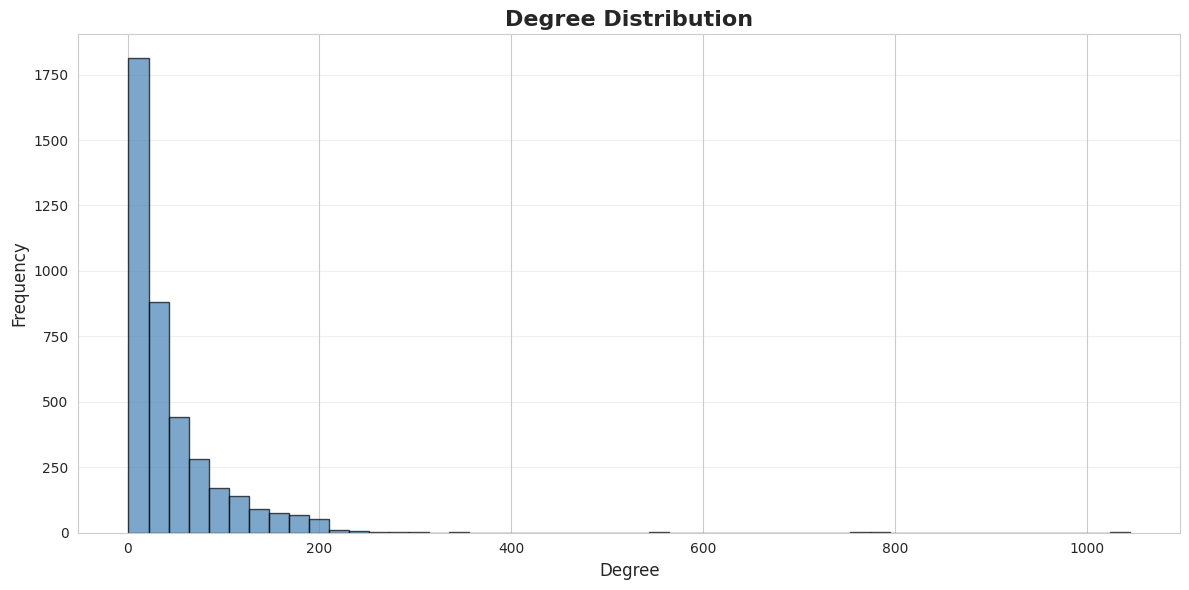

Minimum degree:                      1
Maximum degree:                   1045
Mean degree:                     43.69
Median degree:                   25.00


In [5]:
degree_sequence = sorted(degrees.values(), reverse=True)

# Create binned histogram showing overall degree distribution
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(degree_sequence, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Degree Distribution", fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print distribution statistics
print(f"Minimum degree:           {min(degree_sequence):>12}")
print(f"Maximum degree:           {max(degree_sequence):>12}")
print(f"Mean degree:              {np.mean(degree_sequence):>12.2f}")
print(f"Median degree:            {np.median(degree_sequence):>12.2f}")

# ## 5. Centrality Analysis
# Identify influential nodes using multiple centrality measures:
- **Degree Centrality**: Number of direct connections
- **Betweenness Centrality**: Node's role as bridge between other nodes
- **Closeness Centrality**: Average distance to all other nodes

In [6]:
# Compute centrality metrics
print("Computing centrality measures...")
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
print("✓ Centrality computation complete")

Computing centrality measures...
✓ Centrality computation complete


# ### 5.1 Top Influential Nodes

In [7]:
# %%
def get_top_nodes(centrality_dict, metric_name, top_n=10):
    """
    Extract and format top N nodes by centrality score.

    Parameters:
    -----------
    centrality_dict : dict
        Dictionary mapping node IDs to centrality scores
    metric_name : str
        Name of the centrality metric for display
    top_n : int
        Number of top nodes to return

    Returns:
    --------
    pd.DataFrame
        DataFrame with node IDs and centrality scores
    """
    top_items = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(top_items, columns=['Node ID', metric_name])
    df.index = range(1, len(df) + 1)  # 1-indexed ranking
    return df

# Display top nodes for each centrality metric
print("\n" + "=" * 60)
print("TOP 10 NODES BY DEGREE CENTRALITY")
print("=" * 60)
display(get_top_nodes(degree_centrality, 'Degree Centrality'))

print("\n" + "=" * 60)
print("TOP 10 NODES BY BETWEENNESS CENTRALITY")
print("=" * 60)
display(get_top_nodes(betweenness_centrality, 'Betweenness Centrality'))

print("\n" + "=" * 60)
print("TOP 10 NODES BY CLOSENESS CENTRALITY")
print("=" * 60)
display(get_top_nodes(closeness_centrality, 'Closeness Centrality'))




TOP 10 NODES BY DEGREE CENTRALITY


,Node ID,Degree Centrality
1,107,0.258791
2,1684,0.196137
3,1912,0.186974
4,3437,0.135463
5,0,0.085934
6,2543,0.072808
7,2347,0.072065
8,1888,0.062902
9,1800,0.060674
10,1663,0.058197



TOP 10 NODES BY BETWEENNESS CENTRALITY


,Node ID,Betweenness Centrality
1,107,0.480518
2,1684,0.337797
3,3437,0.236115
4,1912,0.229295
5,1085,0.149015
6,0,0.146306
7,698,0.115330
8,567,0.096310
9,58,0.084360
10,428,0.064309



TOP 10 NODES BY CLOSENESS CENTRALITY


,Node ID,Closeness Centrality
1,107,0.459699
2,58,0.397402
3,428,0.394837
4,563,0.393913
5,1684,0.393606
6,171,0.370493
7,348,0.369916
8,483,0.369848
9,414,0.369543
10,376,0.366558



TOP 10 NODES BY DEGREE CENTRALITY


,Node ID,Degree Centrality
1,107,0.258791
2,1684,0.196137
3,1912,0.186974
4,3437,0.135463
5,0,0.085934
6,2543,0.072808
7,2347,0.072065
8,1888,0.062902
9,1800,0.060674
10,1663,0.058197



TOP 10 NODES BY BETWEENNESS CENTRALITY


,Node ID,Betweenness Centrality
1,107,0.480518
2,1684,0.337797
3,3437,0.236115
4,1912,0.229295
5,1085,0.149015
6,0,0.146306
7,698,0.115330
8,567,0.096310
9,58,0.084360
10,428,0.064309



TOP 10 NODES BY CLOSENESS CENTRALITY


,Node ID,Closeness Centrality
1,107,0.459699
2,58,0.397402
3,428,0.394837
4,563,0.393913
5,1684,0.393606
6,171,0.370493
7,348,0.369916
8,483,0.369848
9,414,0.369543
10,376,0.366558


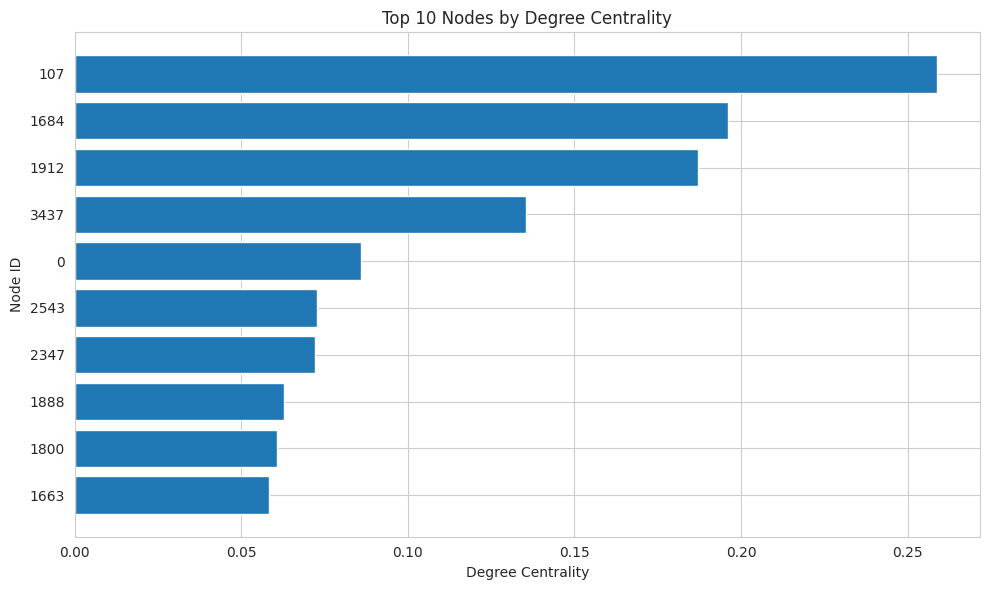

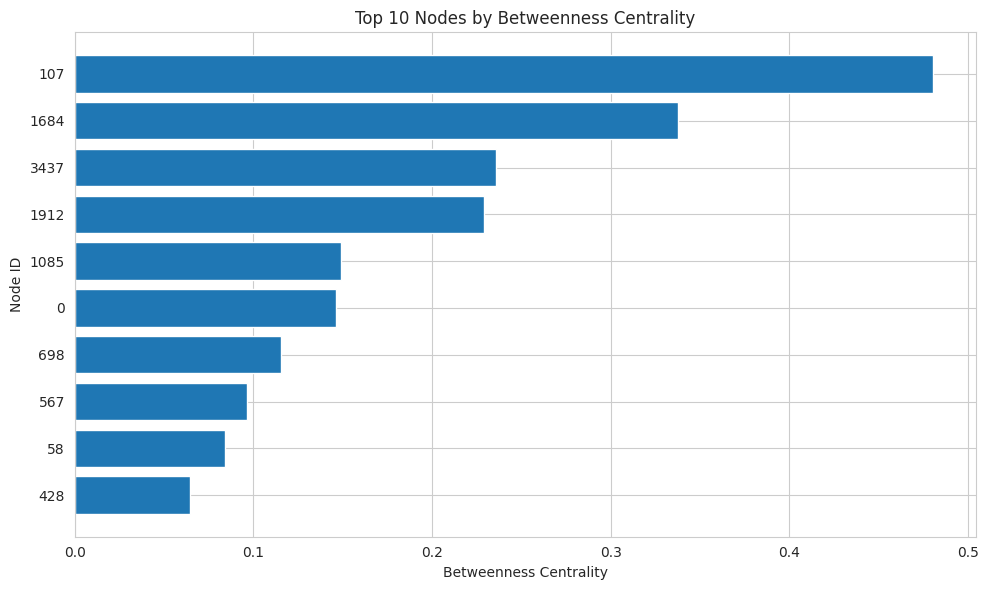

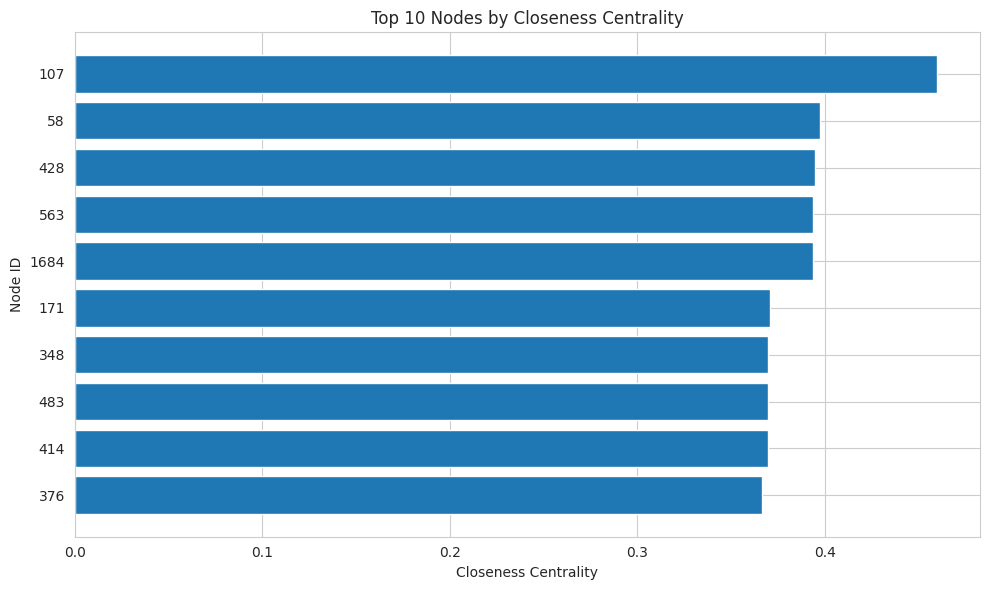

,Node ID,Closeness Centrality
0,107,0.459699
1,58,0.397402
2,428,0.394837
3,563,0.393913
4,1684,0.393606
5,171,0.370493
6,348,0.369916
7,483,0.369848
8,414,0.369543
9,376,0.366558


In [10]:
def get_top_nodes(centrality_dict, metric_name, top_n=10):
    top_items = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(top_items, columns=['Node ID', metric_name])
    df.index = range(1, len(df) + 1)
    return df


def plot_top10_bars(centrality_dict, metric_name, title=None, savepath=None):
    df = get_top_nodes(centrality_dict, metric_name, top_n=10).reset_index(drop=True)
    df_for_plot = df.copy()
    df_for_plot['Node ID'] = df_for_plot['Node ID'].astype(str)
    df_for_plot = df_for_plot.iloc[::-1]  # para que el mayor quede arriba

    plt.figure(figsize=(10, 6))
    plt.barh(df_for_plot['Node ID'], df_for_plot[metric_name])
    plt.xlabel(metric_name)
    plt.ylabel("Node ID")
    plt.title(title or f"Top 10 by {metric_name}")
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=150, bbox_inches="tight")

    plt.show()
    return df  # por si quieres reusar la tabla


# ===== Tablas =====
print("\n" + "=" * 60)
print("TOP 10 NODES BY DEGREE CENTRALITY")
print("=" * 60)
df_degree_top10 = get_top_nodes(degree_centrality, 'Degree Centrality')
try:
    display(df_degree_top10)
except:
    print(df_degree_top10.to_string(index=True))

print("\n" + "=" * 60)
print("TOP 10 NODES BY BETWEENNESS CENTRALITY")
print("=" * 60)
df_bet_top10 = get_top_nodes(betweenness_centrality, 'Betweenness Centrality')
try:
    display(df_bet_top10)
except:
    print(df_bet_top10.to_string(index=True))

print("\n" + "=" * 60)
print("TOP 10 NODES BY CLOSENESS CENTRALITY")
print("=" * 60)
df_close_top10 = get_top_nodes(closeness_centrality, 'Closeness Centrality')
try:
    display(df_close_top10)
except:
    print(df_close_top10.to_string(index=True))


# ===== Visualizaciones (3 gráficos) =====
plot_top10_bars(
    degree_centrality,
    'Degree Centrality',
    title="Top 10 Nodes by Degree Centrality",
    savepath=None  # pon ruta si quieres guardar PNG
)

plot_top10_bars(
    betweenness_centrality,
    'Betweenness Centrality',
    title="Top 10 Nodes by Betweenness Centrality",
    savepath=None
)

plot_top10_bars(
    closeness_centrality,
    'Closeness Centrality',
    title="Top 10 Nodes by Closeness Centrality",
    savepath=None
)



CSV file saved as: top50_neighbors_betweenness.csv


,Center Node,Neighbor,Betweenness
1,107,1684,0.337797
2,107,1085,0.149015
3,107,0,0.146306
4,107,58,0.084360
5,107,428,0.064309
6,107,563,0.062780
7,107,414,0.047633
8,107,1577,0.039785
9,107,348,0.037998
10,107,1718,0.037343


/tmp/ipykernel_63788/2385074891.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


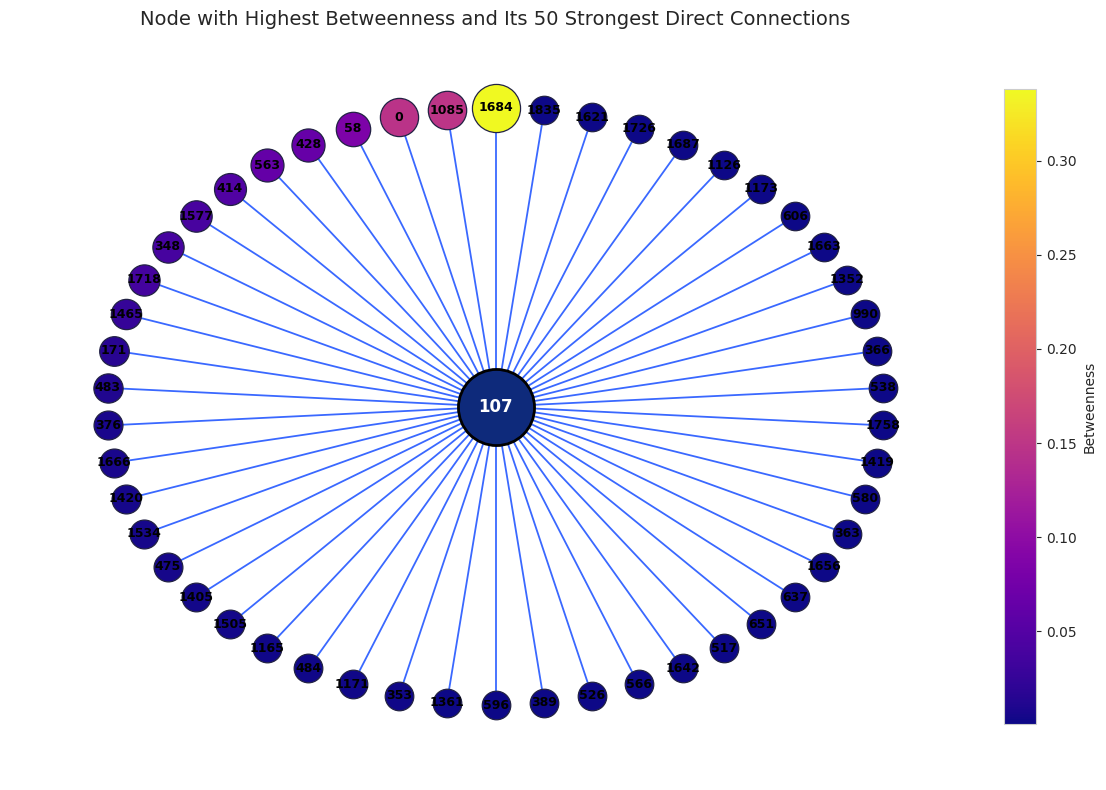

In [ ]:
def top_k_neighbors_of_top_betweenness(G, betweenness_centrality, k=50, output_file="top50_neighbors_betweenness.csv"):
    top_node = max(betweenness_centrality, key=betweenness_centrality.get)
    if isinstance(G, nx.DiGraph):
        neighbors = set(G.predecessors(top_node)) | set(G.successors(top_node))
    else:
        neighbors = set(G.neighbors(top_node))
    data = []
    for n in neighbors:
        data.append({
            "Center Node": top_node,
            "Neighbor": n,
            "Betweenness": betweenness_centrality.get(n, 0.0)
        })
    df = pd.DataFrame(data)
    df = df.sort_values(by="Betweenness", ascending=False).head(k)
    df.index = range(1, len(df) + 1)
    subG = G.subgraph([top_node] + df["Neighbor"].tolist()).copy()
    df.to_csv(output_file, index=False, encoding="utf-8")
    print(f"\nCSV file saved as: {output_file}")
    return df, subG

def plot_star_by_betweenness(
    df_neighbors: pd.DataFrame,
    value_col: str = "Betweenness",
    center_col: str = "Center Node",
    neighbor_col: str = "Neighbor",
    title: str = "Node with Highest Betweenness and Its 50 Strongest Direct Connections",
    radius: float = 6.0,
    start_angle_deg: float = 90.0,
    cmap_name: str = "plasma",
    arrows: bool = False,
    neighbor_size_min: int = 420,
    neighbor_size_max: int = 1200,
    center_size: int = 3000
):
    if df_neighbors is None or df_neighbors.empty:
        print("df_neighbors is empty: nothing to plot.")
        return
    center = df_neighbors[center_col].iloc[0]
    neighbors = df_neighbors[neighbor_col].tolist()
    vals = df_neighbors[value_col].astype(float).values
    vmin, vmax = (float(np.nanmin(vals)), float(np.nanmax(vals)))
    if vmin == vmax:
        vmin = 0.0
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    cmap = cm.get_cmap(cmap_name)
    pos = {center: (0.0, 0.0)}
    n = max(1, len(neighbors))
    order = np.argsort(-vals)
    angles = np.linspace(0, 2 * math.pi, n, endpoint=False) + math.radians(start_angle_deg)
    for rank, idx in enumerate(order):
        node = neighbors[idx]
        ang = angles[rank]
        pos[node] = (radius * math.cos(ang), radius * math.sin(ang))
    fig, ax = plt.subplots(figsize=(12, 8))
    for nb in neighbors:
        x0, y0 = pos[center]
        x1, y1 = pos[nb]
        ax.plot([x0, y0], [x1, y1], color="#2458FF", linewidth=1.3, alpha=0.9)
        if arrows:
            dx, dy = (x1 - x0), (y1 - y0)
            ax.arrow(
                x0, y0, dx * 0.97, dy * 0.97,
                length_includes_head=True,
                head_width=0.18, head_length=0.35,
                fc="#2458FF", ec="#2458FF", alpha=0.9
            )
    nb_colors = [cmap(norm(v)) for v in vals]
    nb_sizes = [neighbor_size_min + (neighbor_size_max - neighbor_size_min) * norm(v) for v in vals]
    for i, nb in enumerate(neighbors):
        ax.scatter(*pos[nb], s=nb_sizes[i], c=[nb_colors[i]], edgecolors="#224", linewidths=0.9, zorder=3)
        ax.text(pos[nb][0], pos[nb][1], str(nb), ha="center", va="center",
                fontsize=9, fontweight="bold", color="black", zorder=4)
    ax.scatter(*pos[center], s=center_size, c="#0E2A7B", edgecolors="black", linewidths=2.0, zorder=5)
    ax.text(pos[center][0], pos[center][1], str(center), ha="center", va="center",
            fontsize=12, fontweight="bold", color="white", zorder=6)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, shrink=0.85, pad=0.02)
    cbar.set_label(value_col, rotation=90)
    ax.set_title(title, fontsize=14)
    ax.set_axis_off()
    m = radius + 1.5
    ax.set_xlim(-m, m)
    ax.set_ylim(-m, m)
    fig.tight_layout()
    plt.show()

df_neighbors, subG = top_k_neighbors_of_top_betweenness(G, betweenness_centrality, k=50)

try:
    display(df_neighbors)
except Exception:
    print(df_neighbors.to_string(index=True))

plot_star_by_betweenness(
    df_neighbors,
    value_col="Betweenness",
    title="Node with Highest Betweenness and Its 50 Strongest Direct Connections",
    radius=6.0,
    start_angle_deg=90,
    cmap_name="plasma",
    arrows=False,
    neighbor_size_min=420,
    neighbor_size_max=1200,
    center_size=3000
)


Nodes **1684**, **0**, and **1085**, although connected to node **107**, are also linked to other important groups or paths within this Facebook network.


## **Node with Highest Degree and Its 50 Strongest Direct Connections** 



CSV file saved as: top50_neighbors_degree.csv


,Center Node,Neighbor,Degree Centrality
1,107,1684,0.196137
2,107,0,0.085934
3,107,1888,0.062902
4,107,1800,0.060674
5,107,1663,0.058197
6,107,1352,0.057949
7,107,483,0.057207
8,107,348,0.056711
9,107,1730,0.055968
10,107,1431,0.054482


/tmp/ipykernel_63788/2668822121.py:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


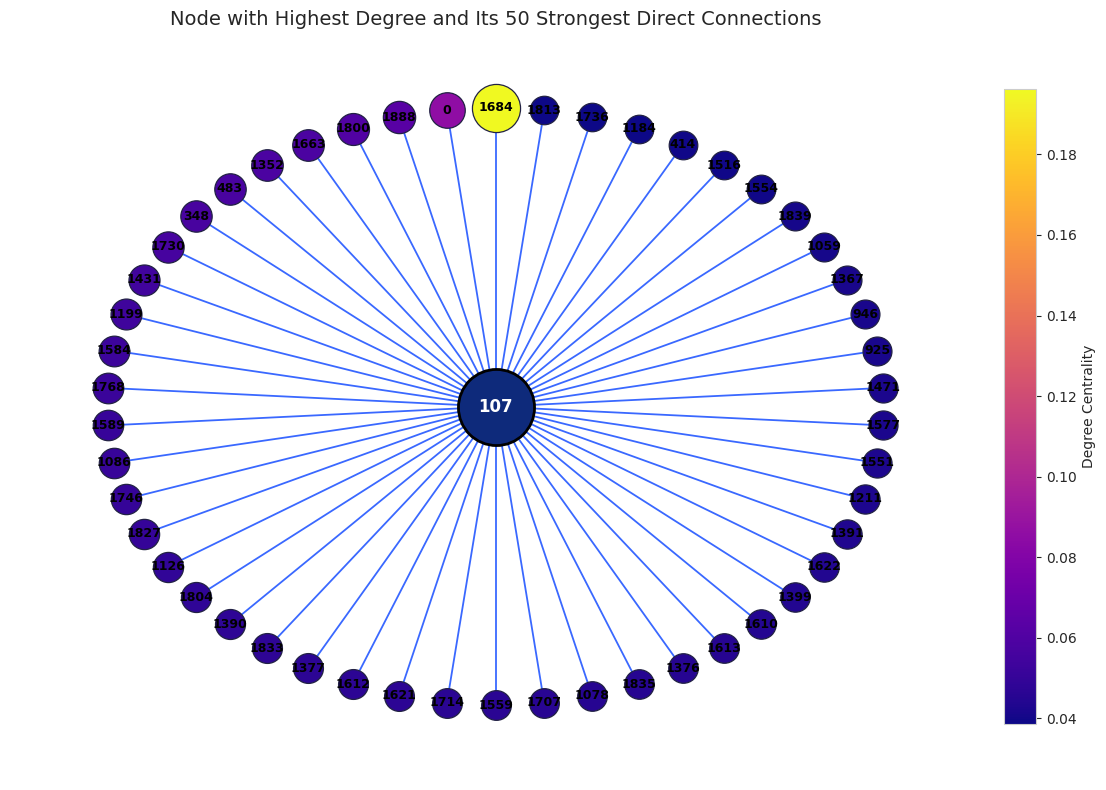

In [ ]:
def top_k_neighbors_of_top_degree(G, degree_centrality, k=50, output_file="top50_neighbors_degree.csv"):
    top_node = max(degree_centrality, key=degree_centrality.get)
    if isinstance(G, nx.DiGraph):
        neighbors = set(G.predecessors(top_node)) | set(G.successors(top_node))
    else:
        neighbors = set(G.neighbors(top_node))
    data = []
    for n in neighbors:
        data.append({
            "Center Node": top_node,
            "Neighbor": n,
            "Degree Centrality": degree_centrality.get(n, 0.0)
        })
    df = pd.DataFrame(data)
    df = df.sort_values(by="Degree Centrality", ascending=False).head(k)
    df.index = range(1, len(df) + 1)
    subG = G.subgraph([top_node] + df["Neighbor"].tolist()).copy()
    df.to_csv(output_file, index=False, encoding="utf-8")
    print(f"\nCSV file saved as: {output_file}")
    return df, subG

def plot_star_by_degree(
    df_neighbors: pd.DataFrame,
    value_col: str = "Degree Centrality",
    center_col: str = "Center Node",
    neighbor_col: str = "Neighbor",
    title: str = "Node with Highest Degree and Its 50 Strongest Direct Connections",
    radius: float = 6.0,
    start_angle_deg: float = 90.0,
    cmap_name: str = "plasma",
    arrows: bool = True,
    force_outward: bool = True,
    neighbor_size_min: int = 450,
    neighbor_size_max: int = 1200,
    center_size: int = 2600
):
    if df_neighbors is None or df_neighbors.empty:
        print("df_neighbors is empty: nothing to plot.")
        return
    center = df_neighbors[center_col].iloc[0]
    neighbors = df_neighbors[neighbor_col].tolist()
    vals = df_neighbors[value_col].astype(float).values
    vmin, vmax = (float(np.nanmin(vals)), float(np.nanmax(vals)))
    if vmin == vmax:
        vmin = 0.0
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    cmap = cm.get_cmap(cmap_name)
    pos = {center: (0.0, 0.0)}
    n = max(1, len(neighbors))
    order = np.argsort(-vals)
    angles = np.linspace(0, 2 * math.pi, n, endpoint=False)
    angles = angles + math.radians(start_angle_deg)
    for rank, idx in enumerate(order):
        node = neighbors[idx]
        ang = angles[rank]
        pos[node] = (radius * math.cos(ang), radius * math.sin(ang))
    fig, ax = plt.subplots(figsize=(12, 8))
    for nb in neighbors:
        x0, y0 = pos[center]
        x1, y1 = pos[nb]
        ax.plot([x0, x1], [y0, y1], color="#2458FF", linewidth=1.3, alpha=0.9)
        if arrows:
            dx, dy = (x1 - x0), (y1 - y0)
            ax.arrow(
                x0, y0, dx * 0.97, dy * 0.97,
                length_includes_head=True,
                head_width=0.18, head_length=0.35,
                fc="#2458FF", ec="#2458FF", alpha=0.9
            )
    nb_colors = [cmap(norm(v)) for v in vals]
    nb_sizes = [neighbor_size_min + (neighbor_size_max - neighbor_size_min) * norm(v) for v in vals]
    for i, nb in enumerate(neighbors):
        ax.scatter(*pos[nb], s=nb_sizes[i], c=[nb_colors[i]], edgecolors="#224", linewidths=0.9, zorder=3)
        ax.text(pos[nb][0], pos[nb][1], str(nb), ha="center", va="center",
                fontsize=9, fontweight="bold", color="black", zorder=4)
    ax.scatter(*pos[center], s=center_size, c="#0E2A7B", edgecolors="black", linewidths=2.0, zorder=5)
    ax.text(pos[center][0], pos[center][1], str(center), ha="center", va="center",
            fontsize=12, fontweight="bold", color="white", zorder=6)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, shrink=0.85, pad=0.02)
    cbar.set_label(value_col, rotation=90)
    ax.set_title(title, fontsize=14)
    ax.set_axis_off()
    m = radius + 1.5
    ax.set_xlim(-m, m)
    ax.set_ylim(-m, m)
    fig.tight_layout()
    plt.show()

df_neighbors, subG = top_k_neighbors_of_top_degree(G, degree_centrality, k=50)

try:
    display(df_neighbors)
except Exception:
    print(df_neighbors.to_string(index=True))

plot_star_by_degree(
    df_neighbors,
    value_col="Degree Centrality",
    title="Node with Highest Degree and Its 50 Strongest Direct Connections",
    radius=6.0,
    start_angle_deg=90,
    cmap_name="plasma",
    arrows=False,
    neighbor_size_min=420,
    neighbor_size_max=1200,
    center_size=3000
)


As observed, node 1684 also has a high degree value, standing out as a node with potential secondary influence, possibly acting as a link to other parts of the network.


## **Node with Highest closeness and Its 50 Strongest Direct Connections** 


CSV file saved as: top50_neighbors_closeness.csv
 Center Node  Neighbor  Closeness
         107        58   0.397402
         107       428   0.394837
         107       563   0.393913
         107      1684   0.393606
         107       171   0.370493
         107       348   0.369916
         107       483   0.369848
         107       414   0.369543
         107       376   0.366558
         107       475   0.366192
         107       566   0.364967
         107      1666   0.364704
         107      1534   0.364605
         107       484   0.363162
         107       353   0.363097
         107      1171   0.362445
         107       651   0.362282
         107       420   0.361019
         107      1085   0.357852
         107      1687   0.357250
         107      1577   0.357187
         107      1718   0.356651
         107      1165   0.356493
         107      1136   0.356305
         107      1465   0.354615
         107         0   0.353343
         107       580   0.345040

/tmp/ipykernel_63788/810632995.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


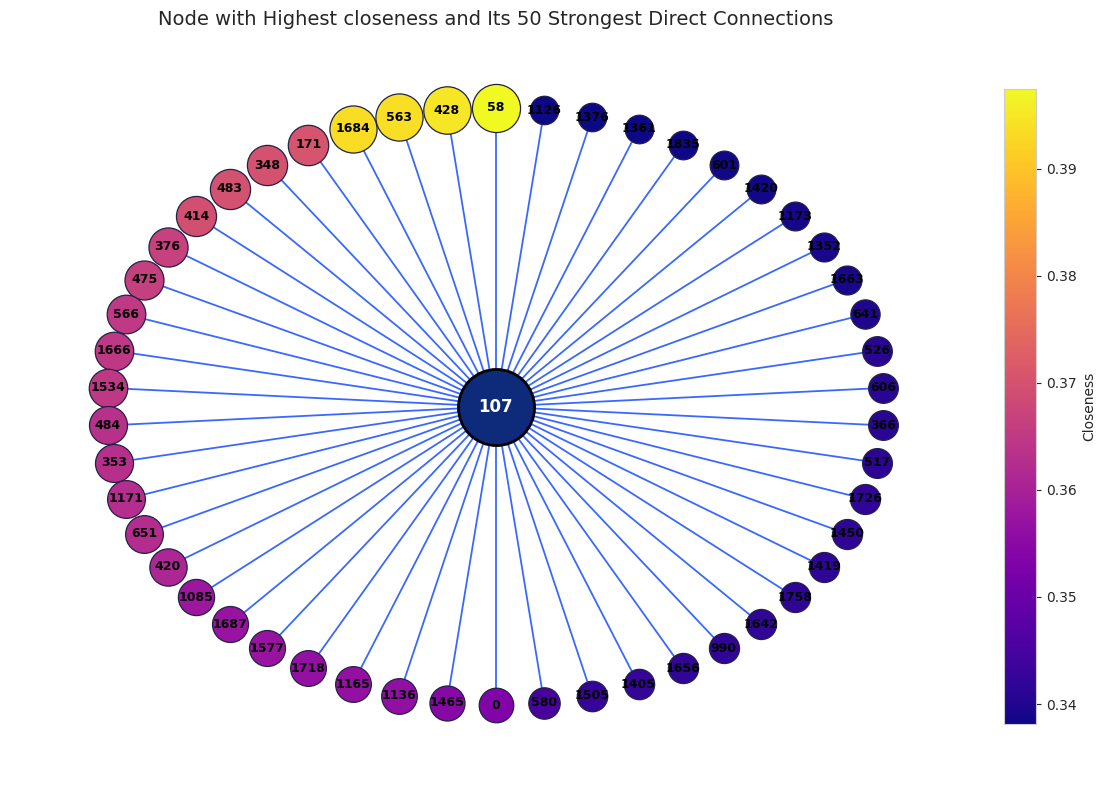

In [ ]:
def top_k_neighbors_of_top_closeness(
    G,
    k=50,
    output_file="top50_neighbors_closeness.csv",
    closeness_centrality=None
):
    if closeness_centrality is None:
        closeness_centrality = nx.closeness_centrality(G)
    top_node = max(closeness_centrality, key=closeness_centrality.get)
    if isinstance(G, nx.DiGraph):
        neighbors = set(G.predecessors(top_node)) | set(G.successors(top_node))
    else:
        neighbors = set(G.neighbors(top_node))
    df = pd.DataFrame(
        [{"Center Node": top_node,
          "Neighbor": n,
          "Closeness": float(closeness_centrality.get(n, 0.0))}
         for n in neighbors]
    ).sort_values("Closeness", ascending=False).head(k)
    subG = G.subgraph([top_node] + df["Neighbor"].tolist()).copy()
    df_to_save = df[["Center Node", "Neighbor", "Closeness"]]
    df_to_save.to_csv(output_file, index=False, encoding="utf-8")
    print(f"CSV file saved as: {output_file}")
    try:
        display(df_to_save.style.hide(axis="index"))
    except Exception:
        print(df_to_save.to_string(index=False))
    return df_to_save, subG

def plot_star_by_closeness(
    df_neighbors: pd.DataFrame,
    value_col: str = "Closeness",
    center_col: str = "Center Node",
    neighbor_col: str = "Neighbor",
    title: str = "Node with Highest Closeness and Its 50 Strongest Direct Connections",
    radius: float = 6.0,
    start_angle_deg: float = 90.0,
    cmap_name: str = "plasma",
    arrows: bool = False,
    neighbor_size_min: int = 420,
    neighbor_size_max: int = 1200,
    center_size: int = 3000
):
    if df_neighbors is None or df_neighbors.empty:
        print("df_neighbors is empty: nothing to plot.")
        return
    center = df_neighbors[center_col].iloc[0]
    neighbors = df_neighbors[neighbor_col].tolist()
    vals = df_neighbors[value_col].astype(float).values
    vmin, vmax = float(np.nanmin(vals)), float(np.nanmax(vals))
    if vmin == vmax:
        vmin = 0.0
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    cmap = cm.get_cmap(cmap_name)
    pos = {center: (0.0, 0.0)}
    n = max(1, len(neighbors))
    order = np.argsort(-vals)
    angles = np.linspace(0, 2 * math.pi, n, endpoint=False) + math.radians(start_angle_deg)
    for rank, idx in enumerate(order):
        node = neighbors[idx]
        ang = angles[rank]
        pos[node] = (radius * math.cos(ang), radius * math.sin(ang))
    fig, ax = plt.subplots(figsize=(12, 8))
    for nb in neighbors:
        x0, y0 = pos[center]
        x1, y1 = pos[nb]
        ax.plot([x0, x1], [y0, y1], color="#2458FF", linewidth=1.3, alpha=0.9)
        if arrows:
            dx, dy = (x1 - x0), (y1 - y0)
            ax.arrow(
                x0, y0, dx * 0.97, dy * 0.97,
                length_includes_head=True,
                head_width=0.18, head_length=0.35,
                fc="#2458FF", ec="#2458FF", alpha=0.9
            )
    nb_colors = [cmap(norm(v)) for v in vals]
    nb_sizes = [neighbor_size_min + (neighbor_size_max - neighbor_size_min) * norm(v) for v in vals]
    for i, nb in enumerate(neighbors):
        ax.scatter(*pos[nb], s=nb_sizes[i], c=[nb_colors[i]], edgecolors="#224", linewidths=0.9, zorder=3)
        ax.text(pos[nb][0], pos[nb][1], str(nb), ha="center", va="center",
                fontsize=9, fontweight="bold", color="black", zorder=4)
    ax.scatter(*pos[center], s=center_size, c="#0E2A7B", edgecolors="black", linewidths=2.0, zorder=5)
    ax.text(pos[center][0], pos[center][1], str(center), ha="center", va="center",
            fontsize=12, fontweight="bold", color="white", zorder=6)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, shrink=0.85, pad=0.02)
    cbar.set_label(value_col, rotation=90)
    ax.set_title(title, fontsize=14)
    ax.set_axis_off()
    m = radius + 1.5
    ax.set_xlim(-m, m)
    ax.set_ylim(-m, m)
    fig.tight_layout()
    plt.show()

df_neighbors_close, subG_close = top_k_neighbors_of_top_closeness(G, k=50)

plot_star_by_closeness(
    df_neighbors_close,
    value_col="Closeness",
    title="Node with Highest Closeness and Its 50 Strongest Direct Connections",
    radius=6.0,
    start_angle_deg=90,
    cmap_name="plasma",
    arrows=False,
    neighbor_size_min=420,
    neighbor_size_max=1200,
    center_size=3000
)


 **node 107**, the most central in the network. Nodes **1684, 58, 428, and 563** are the closest to it and **depend on their connection to efficiently reach the rest of the network**.


# ## 6. Community Detection
# Apply Greedy Modularity algorithm to identify natural clusters in the network

In [11]:
# Detect communities using greedy modularity optimization
print("Detecting communities...")
communities = community.greedy_modularity_communities(G)
n_communities = len(communities)

# Calculate community statistics
community_sizes = [len(c) for c in communities]
modularity = community.modularity(G, communities)

print("=" * 60)
print("COMMUNITY DETECTION RESULTS")
print("=" * 60)
print(f"Number of communities:    {n_communities:>12}")
print(f"Modularity score:         {modularity:>12.4f}")
print(f"Largest community size:   {max(community_sizes):>12,}")
print(f"Smallest community size:  {min(community_sizes):>12,}")
print(f"Average community size:   {np.mean(community_sizes):>12.1f}")
print("=" * 60)



Detecting communities...
COMMUNITY DETECTION RESULTS
Number of communities:              13
Modularity score:               0.7774
Largest community size:            983
Smallest community size:             6
Average community size:          310.7


# ### 6.1 Community Visualization
# Visualize the detected community structure (recommended for graphs with <1000 nodes)

In [12]:

# %%
def visualize_communities(G, communities, max_nodes=1000):
    """
    Create network visualization with communities colored distinctly.

    Parameters:
    -----------
    G : networkx.Graph
        Input graph
    communities : list
        List of node sets representing communities
    max_nodes : int
        Maximum nodes to visualize (performance threshold)

    Note: Large graphs may take significant time to render
    """
    if G.number_of_nodes() > max_nodes:
        print(f"⚠ Visualization skipped: Graph has {G.number_of_nodes():,} nodes (threshold: {max_nodes:,})")
        print("Consider using a subgraph or increasing max_nodes parameter")
        return

    print("Generating community visualization...")
    fig, ax = plt.subplots(figsize=(14, 10))

    # Generate layout (computationally expensive for large graphs)
    pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)

    # Color palette for communities
    colors = plt.cm.Set3(np.linspace(0, 1, len(communities)))

    # Draw each community with distinct color
    for i, (com, color) in enumerate(zip(communities, colors)):
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=list(com),
            node_size=30,
            node_color=[color],
            label=f'Community {i+1} (n={len(com)})',
            alpha=0.8
        )

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5)

    ax.set_title("Network Community Structure", fontsize=18, fontweight='bold', pad=20)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    print("✓ Visualization complete")

# Uncomment to generate visualization (warning: slow for large networks)
visualize_communities(G, communities, max_nodes=1000)


⚠ Visualization skipped: Graph has 4,039 nodes (threshold: 1,000)
Consider using a subgraph or increasing max_nodes parameter


# ## 7. Summary and Insights
# Key findings from the network analysis

In [13]:
# %%
print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)
print("\nKey Insights:")
print(f"• The network contains {n_communities} distinct communities")
print(f"• Average node has {avg_degree:.1f} connections")
print(f"• Network modularity: {modularity:.3f} (higher = stronger community structure)")
print(f"• Most central node: {max(degree_centrality, key=degree_centrality.get)}")
print("=" * 60)


ANALYSIS COMPLETE

Key Insights:
• The network contains 13 distinct communities
• Average node has 43.7 connections
• Network modularity: 0.777 (higher = stronger community structure)
• Most central node: 107
